In [1]:
from modules.utils import ResizeWithAspectRatio,show_image
from modules.mask import BlockMasking,RandomMaskingStrategy
from torchvision import transforms as T
from PIL import Image
import torch
import numpy as np
import matplotlib.pyplot as plt

/home/zihao/anaconda3/envs/cxr/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
vis_trans={"PIL":
           T.Compose([
            ResizeWithAspectRatio(size=(224, 224)),
                ]),
            "Tensor":
            T.Compose([
            # T.RandomHorizontalFlip(),
            ResizeWithAspectRatio(size=(224, 224)),
            T.ToTensor(),
                ])
           }

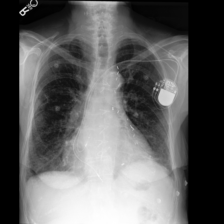

In [3]:
vis_trans["PIL"](Image.open('demo.jpg').convert('RGB'))

In [4]:
img_tensor=vis_trans["Tensor"](Image.open('demo.jpg').convert('RGB')).unsqueeze(0)
# random_masking=MaskingStrategy(img_size=224,patch_size=16,in_chans=3,embed_dim=1024,choice='random')
random_masking=RandomMaskingStrategy(img_size=224,patch_size=16,device='cpu')
block_masking=BlockMasking(img_size=224,patch_size=16,device='cpu')

In [5]:
img_tensor.shape

torch.Size([1, 3, 224, 224])

In [6]:
im_random_masked, mask,ids_restore=random_masking.forward(img_tensor,mask_ratio=0.75)
im_block_masked,mask=block_masking(img_tensor,mask_ratio=0.4)

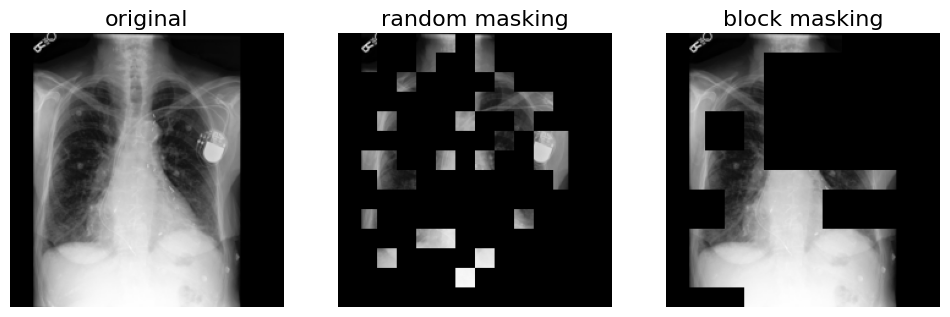

In [8]:
# make the plt figure larger
plt.rcParams['figure.figsize'] = [12, 24]

plt.subplot(1, 3, 1)
show_image(torch.einsum('nchw->nhwc', img_tensor).detach().cpu()[0], "original")

plt.subplot(1, 3, 2)
show_image(im_random_masked[0], "random masking")

plt.subplot(1, 3, 3)
show_image(im_block_masked[0], "block masking")

plt.show()